In [48]:
from utils import *

import pandas as pd

plt.rc('font', size=16, family='serif')
plt.rc('mathtext', default='it', fontset='cm')
# plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-muted')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

Text(0.5, 1.0, '$\\ell$')

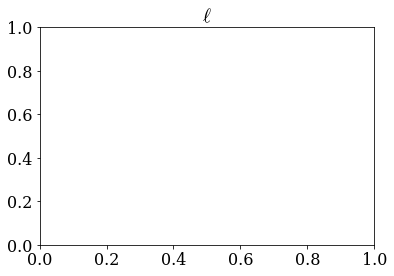

In [2]:
plt.subplots(1,1)
plt.title(r'$\ell$')

In [3]:
x = np.random.randint(0,100,3).reshape(1,-1)
y = np.random.randint(0,100,3).reshape(1,-1)
z = np.random.randint(0,100,3).reshape(1,-1)
print(NTK(3)(x,y))
x = normalize(x)
y = normalize(y)
z = normalize(z)
print(NTK(3)(x,y))

[[7895.54842782]]
[[0.54056122]]


In [4]:
print(x)
print(y)

[[0.26476432 0.64299905 0.718646  ]]
[[0.67001685 0.74148532 0.03573423]]


In [5]:
l = 1.3834239
k1 = Matern(length_scale=l, nu = 0.5)
k2 = NTK(depth = 25, c = 2.0, bias = 0)
print(k1(x,y))
print(k2(x,y))

[[0.5607894]]
[[0.34549164]]


In [6]:
from numpy import float128

# Important

/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


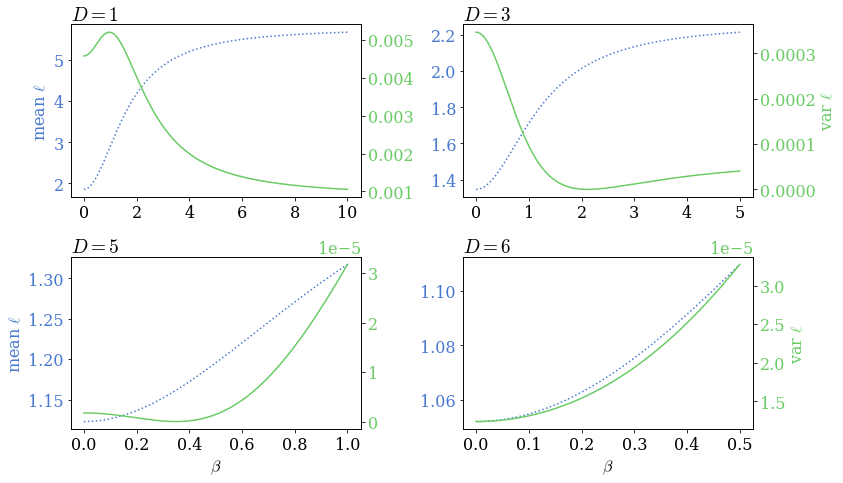

In [49]:
D = 5
nn = 5
d = 100



fig, ax = plt.subplots(2, 2, figsize=(12,7))
ax = ax.ravel()

for j in range(0,4):
    biases = []
    means = []
    vars = []

    if   j == 0 : D=1; bound=10
    elif j == 1 : D=3; bound=5
    elif j == 2 : D=5; bound=1
    elif j == 3 : D=6; bound=0.5
    for b in np.linspace(0,bound,1000):
        # bias = 10.0**b
        bias = b
        biases.append(bias)
        k2 = NTK(depth = D, c = 2.0, bias = bias)
        # print(f"bias = {bias}")

        lengthscales = np.zeros([nn])
        np.random.seed(513248907)
        for i in range(0,nn):
            x2 = np.random.randint(0,100,d).reshape(1,-1)
            y2 = np.random.randint(0,100,d).reshape(1,-1)

            x2 = normalize(x2)
            y2 = normalize(y2)

            K = k2(x2,y2)
            lengthscales[i] = - np.linalg.norm(x2-y2) / np.log(K)
        mean = np.mean(lengthscales)
        var = np.var(lengthscales)
        # print(K)
        # print(f"mean(lengthscales) = {mean}")
        # print(f"var(lengthscales) = {var}")
        means.append(mean)
        vars.append(var)


    dat = {'bias': biases,
            'mean_l': means,
            'var_l': vars}

    df = pd.DataFrame(data=dat)

    df['log_bias'] = np.log(df.bias)

    # df.plot(x='log_bias',y='mean_l')
    # df.plot(x='log_bias',y='var_l')

    # df.plot(x='bias',y='mean_l')
    # df.plot(x='bias',y='var_l')

    color = colors[0]
    if j in (0, 2):
        ax[j].set_ylabel('mean ' + r'$\ell$', color=color)
    ax[j].plot(df['bias'], df['mean_l'], color=color, ls=':')
    ax[j].tick_params(axis='y', labelcolor=color)

    ax2 = ax[j].twinx()  # instantiate a second axes that shares the same x-axis

    color = colors[1]
    if j in (1, 3):
        ax2.set_ylabel('var ' + r'$\ell$', color=color)  # we already handled the x-label with ax1
    ax2.plot(df['bias'], df['var_l'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    if j in (2,3):
        ax[j].set_xlabel(r'$\beta$')

    ax[j].set_title(rf'$D={D}$', pad=-5, loc='left')


fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig(f'./variance/variance2x2.svg')

# 1 3
# 5 6

/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


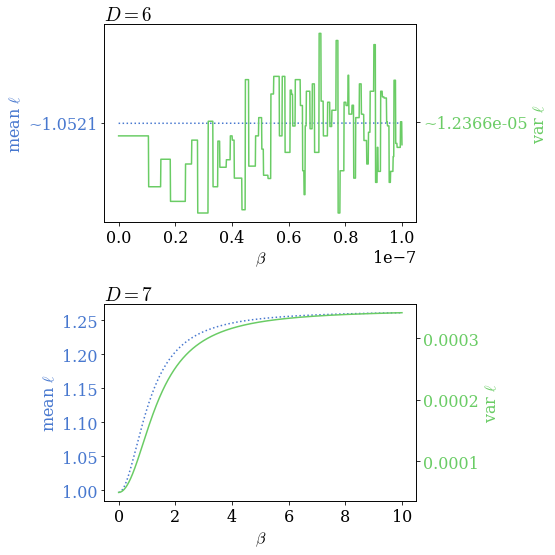

In [50]:
D = 5
nn = 5
d = 100

fig, ax = plt.subplots(2, 1, figsize=(8,8))
ax = ax.ravel()

ax2 = [None, None]
for j in range(0,2):
    biases = []
    means = []
    vars = []

    if   j == 0 : D=6; bound=1e-7
    elif j == 1 : D=7; bound=10
    elif j == 2 : D=5; bound=1
    elif j == 3 : D=6; bound=0.5
    for b in np.linspace(0,bound,1000):
        # bias = 10.0**b
        bias = b
        biases.append(bias)
        k2 = NTK(depth = D, c = 2.0, bias = bias)
        # print(f"bias = {bias}")

        lengthscales = np.zeros([nn])
        np.random.seed(513248907)
        for i in range(0,nn):
            x2 = np.random.randint(0,100,d).reshape(1,-1)
            y2 = np.random.randint(0,100,d).reshape(1,-1)

            x2 = normalize(x2)
            y2 = normalize(y2)

            K = k2(x2,y2)
            lengthscales[i] = - np.linalg.norm(x2-y2) / np.log(K)
        mean = np.mean(lengthscales)
        var = np.var(lengthscales)
        # print(K)
        # print(f"mean(lengthscales) = {mean}")
        # print(f"var(lengthscales) = {var}")
        means.append(mean)
        vars.append(var)


    dat = {'bias': biases,
            'mean_l': means,
            'var_l': vars}

    df = pd.DataFrame(data=dat)

    df['log_bias'] = np.log(df.bias)

    # df.plot(x='log_bias',y='mean_l')
    # df.plot(x='log_bias',y='var_l')

    # df.plot(x='bias',y='mean_l')
    # df.plot(x='bias',y='var_l')

    color = colors[0]

    ax[j].set_ylabel('mean ' + r'$\ell$', color=color)
    if j == 0:
        ax[j].plot(df['bias'], df['mean_l'], color=color, ls=':', label="Mean")
    else:
        ax[j].plot(df['bias'], df['mean_l'], color=color, ls=':')
    ax[j].tick_params(axis='y', labelcolor=color)
    ax[j].ticklabel_format(useOffset=False)

    ax2[j] = ax[j].twinx()  # instantiate a second axes that shares the same x-axis

    color = colors[1]

    ax2[j].set_ylabel('var ' + r'$\ell$', color=color)  # we already handled the x-label with ax1
    if j == 0:
        ax2[j].plot(df['bias'], df['var_l'], color=color, label="Variance")
    else:
        ax2[j].plot(df['bias'], df['var_l'], color=color)
    ax2[j].tick_params(axis='y', labelcolor=color)
    ax2[j].ticklabel_format(useOffset=False)

    ax[j].set_xlabel(r'$\beta$')
    ax[j].set_title(rf'$D={D}$', pad=-5, loc='left')

    if j == 0:
        ax[0].set_yticks([df['mean_l'][999]])
        ax[0].set_yticklabels(["~1.0521"])
        ax2[0].set_yticks([df['var_l'][998]])
        ax2[0].set_yticklabels(["~1.2366e-05"])

# fig.legend(loc='center', ncol=2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig(f'./variance/variance2x1.svg')


# 1 3
# 5 6

In [23]:
df['mean_l'][999]

1.2612956977402818

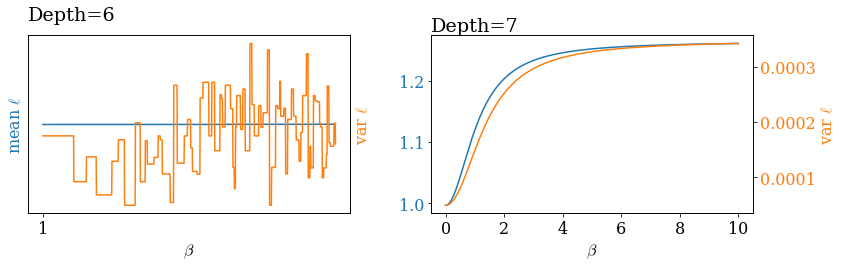

In [24]:
ax[0].set_yticks([df['var_l'][999]])
ax[0].set_yticklabels([1])
fig

In [93]:
D = 3
nn = 5
d = 100

biases = []
means = []
vars = []

for b in np.linspace(0,bound,1000):
    # bias = 10.0**b
    bias = b
    biases.append(bias)
    k2 = NTK(depth = D, c = 2.0, bias = bias)
    # print(f"bias = {bias}")

    lengthscales = np.zeros([nn])
    np.random.seed(513248907)
    for i in range(0,nn):
        x2 = np.random.randint(0,100,d).reshape(1,-1)
        y2 = np.random.randint(0,100,d).reshape(1,-1)

        x2 = normalize(x2)
        y2 = normalize(y2)

        K = k2(x2,y2)
        lengthscales[i] = - np.linalg.norm(x2-y2) / np.log(K)
    mean = np.mean(lengthscales)
    var = np.var(lengthscales)
    # print(K)
    # print(f"mean(lengthscales) = {mean}")
    # print(f"var(lengthscales) = {var}")
    means.append(mean)
    vars.append(var)


dat = {'bias': biases,
        'mean_l': means,
        'var_l': vars}

df = pd.DataFrame(data=dat)

df['log_bias'] = np.log(df.bias)

# df.plot(x='log_bias',y='mean_l')
# df.plot(x='log_bias',y='var_l')

# df.plot(x='bias',y='mean_l')
# df.plot(x='bias',y='var_l')


# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# fig.savefig(f'./variance/variance2x1.svg')

# 1 3
# 5 6

/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Sorts by variances

In [94]:
df.sort_values('var_l')

,bias,mean_l,var_l,log_bias
211,2.112112,2.033977,1.696915e-08,0.747688
212,2.122122,2.035623,1.773961e-08,0.752417
210,2.102102,2.032315,2.234008e-08,0.742938
213,2.132132,2.037254,2.449795e-08,0.757122
209,2.092092,2.030638,3.400901e-08,0.738165
...,...,...,...,...
4,0.040040,1.346674,3.457041e-04,-3.217875
3,0.030030,1.346247,3.460390e-04,-3.505557
2,0.020020,1.345941,3.462785e-04,-3.911023
1,0.010010,1.345758,3.464223e-04,-4.604170


# Old

In [22]:
# "d" doesn't matter (here is S^{49})

k1 = Matern(length_scale=2.07, nu=0.5)
k2 = NTK(depth = 3, c = 2.0, bias = 2.3)


x2 = np.random.randint(0,100,50).reshape(1,-1)
y2 = np.random.randint(0,100,50).reshape(1,-1)

x2 = normalize(x2)
y2 = normalize(y2)

print(k1(x2,y2))
print(k2(x2,y2))

[[0.70552415]]
[[0.7046552]]


In [11]:
k2 = NTK(depth = 3, c = 2.0, bias = 0.0)

x = np.array([1,0,0]).reshape(1,-1)
y = np.array([0,1,0]).reshape(1,-1)

k2(x,x)

array([[0.99999998]])